# IMPLEMENTASI METODE K-NN ALGORITHM DAN DECISION TREE (UTS)

K-NN (K — NEAREST NEIGHBORS)
> KNN (K — Nearest Neighbors) is one of many (supervised learning) algorithms used in data mining and machine learning, it’s a classifier algorithm where the learning is based “how similar” is a data (a vector) from other .

DECISION TREE
> Decision Tree Mining is a type of data mining technique that is used to build Classification Models. It builds classification models in the form of a tree-like structure, just like its name. This type of mining belongs to supervised class learning.

Import Modul

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

READ AND CALL DATASET

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RagilSalsabil/datamining/gh-pages/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.shape

(116, 10)

SPLIT UP DATASET

In [ ]:
# create a dataframe with all training data except the target column
x = df.drop(columns=['Classification'])

x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#separate target values

y = df['Classification'].values

#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

BUILDING AND TRAINING THE MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for i in 116:
  print()

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 50)

# fit the classifier to the data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

TESTING THE MODEL

In [ ]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)

0.5833333333333334

DECISION TREE


In [ ]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [ ]:
clf.predict([[2., 2.]])

array([1])

In [ ]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [ ]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

[Text(0.4659090909090909, 0.9285714285714286, 'X[2] <= 91.5\ngini = 0.495\nsamples = 116\nvalue = [52, 64]'),
 Text(0.22727272727272727, 0.7857142857142857, 'X[7] <= 13.248\ngini = 0.42\nsamples = 50\nvalue = [35, 15]'),
 Text(0.13636363636363635, 0.6428571428571429, 'X[7] <= 3.281\ngini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.5, 'X[4] <= 6.464\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.13636363636363635, 0.35714285714285715, 'X[5] <= 8.747\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.09090909090909091, 0.21428571428571427, 'X[0] <= 66.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.045454545454545456, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13636363636363635, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.18181818181818182, 0.21428571428571427, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),


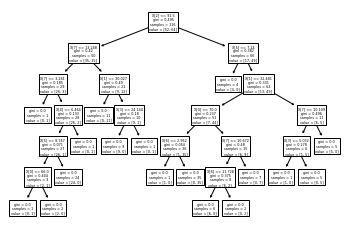

In [ ]:
tree.plot_tree(clf)

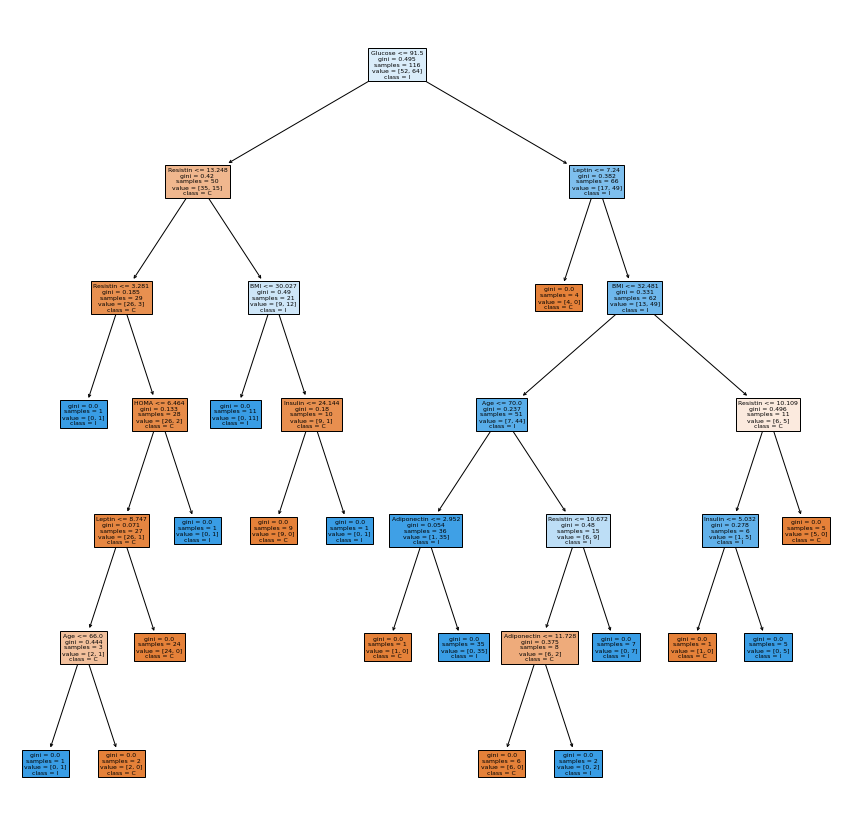

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, feature_names=list(df.columns.values)[:9], class_names=list(df.columns.values)[9] ,filled=True)